In [2]:
import numpy as np
from PIL import Image
from detector import Detector
import matplotlib.pyplot as plt
import matplotlib.patches as label_box
import os

In [3]:
ckpt = "weights/pretrained_backbone/pretrained_backbone.pth.tar"
detector = Detector(ckpt, use_gpu=False)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100.0%



======================== warning ==========================
This detector uses "RGB" input convention by default
If you are using Opencv, the image is likely to be in "BRG"!!!



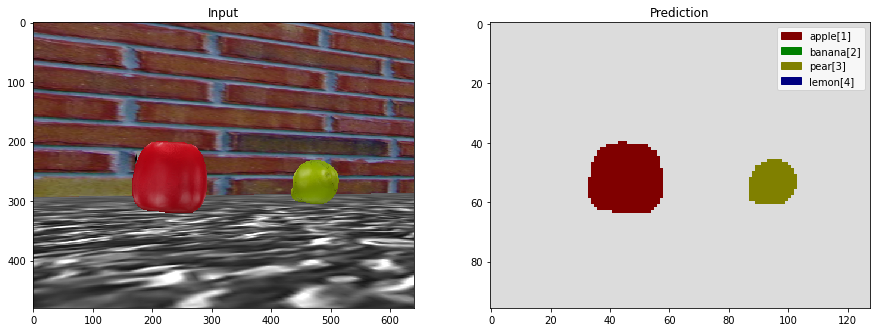

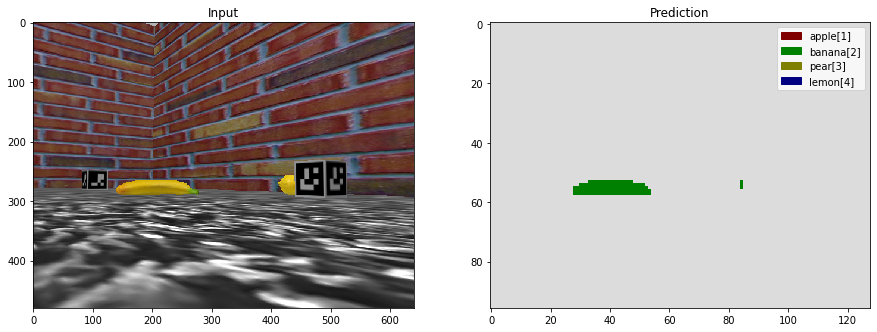

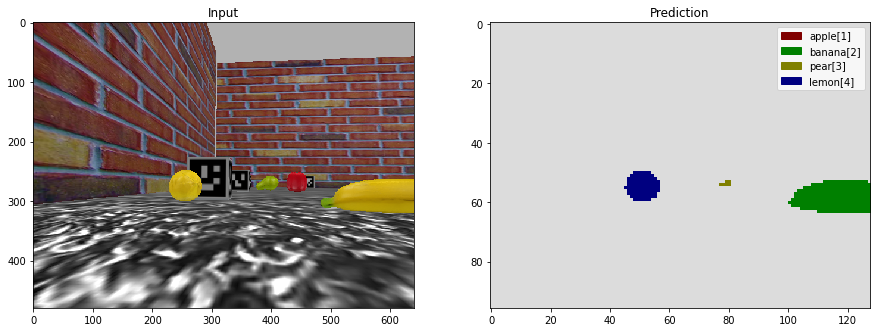

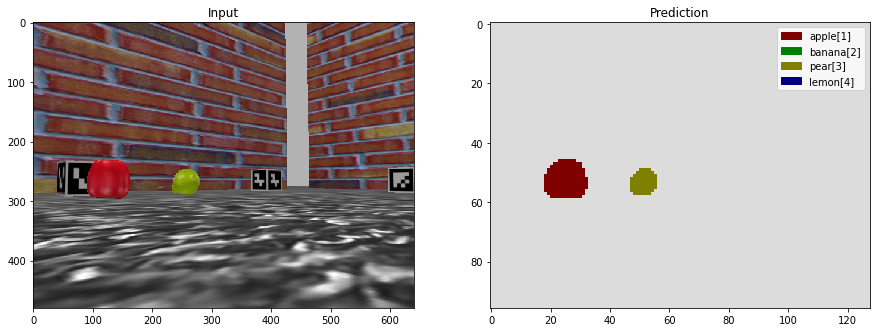

In [4]:
test_dir = "test_images/sim"
pred_dir = os.path.join(test_dir, "pred")
os.makedirs(pred_dir, exist_ok=True)
all_test_images = [file for file in os.listdir(test_dir) if file.endswith('.png')] 
for image_name in all_test_images:
    np_img = np.array(Image.open(os.path.join(test_dir, image_name)))
    pred, colour_map = detector.detect_single_image(np_img)
    title = ["Input", "Prediction"]
    pics = [np_img, colour_map]
    ##
    apple_label = label_box.Patch(color=detector.colour_code[1]/255, label='apple[1]')
    banana_label = label_box.Patch(color=detector.colour_code[2]/255, label='banana[2]')
    pear_label = label_box.Patch(color=detector.colour_code[3]/255, label='pear[3]')
    lemon_label = label_box.Patch(color=detector.colour_code[4]/255, label='lemon[4]')

    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(pics[0], interpolation='nearest')
    axs[0].set_title(title[0])
    axs[1].imshow(pics[1], interpolation='nearest')
    axs[1].set_title(title[1])
    axs[1].legend(handles=[apple_label, banana_label, pear_label, lemon_label])
    path = os.path.join(pred_dir, image_name)
    plt.savefig(os.path.join(pred_dir, image_name))